<a href="https://colab.research.google.com/github/AMV1909/cd_202202_axel_morales/blob/main/Taller_N%C2%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyproj

In [2]:
import pandas as pd
from datetime import datetime
import pyproj
from numpy import abs, sqrt
import matplotlib.pyplot as plt
import seaborn as sb
from math import ceil, floor, e, pi
import array

In [ ]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)

df

In [4]:
df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")

In [5]:
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

Sacar la distancia de los puntos hacia la alcadía de Floridablanca

In [7]:
def distancia():
  lat_alcaldia = 7.062958503050063
  lon_alcaldia = -73.08619741888012

  x_alcaldia, y_alcaldia = P(lon_alcaldia, lat_alcaldia)

  df['distancia'] = sqrt((x_alcaldia-df['x'])**2 + (y_alcaldia-df['y'])**2)

  return df

In [ ]:
distancia()

In [9]:
datosf = df
datosf = datosf.select_dtypes(exclude = ['object', 'datetime64'])
datosf = datosf.drop('año', axis = 1)
datosf = datosf.drop('cod_pais_o', axis = 1)
datosf = datosf.drop('condicion_final', axis = 1)
datosf = datosf.drop('fecha_defuncion', axis = 1)
datosf = datosf.drop('certif_defuncion', axis = 1)

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(24,24))
plt.title('Person Correlation of Feaures', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [11]:
def casos():
  minx = df['x'].min() - ab
  miny = df['y'].min() - ab
  maxx = df['x'].max() + ab
  maxy = df['y'].max() + ab

  len_x = ceil((maxx-minx)/res)
  len_y = ceil((maxy-miny)/res)

  matriz = [[0 for i in range(len_x)] for j in range(len_y)]

  for i in range(df.shape[0]):
    a = floor((df.loc[i, 'y'] - miny)/res)
    b = floor((df.loc[i, 'x'] - minx)/res)

    matriz[a][b] += 1

  return len_x, len_y, matriz

In [12]:
def paint(matriz):
  fig = plt.figure(figsize=(50, 40))

  ax = fig.add_subplot(111)
  ax.set_title('Mapa de calor')
  plt.imshow(matriz)
  ax.set_aspect('equal')

  cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
  cax.get_xaxis().set_visible(False)
  cax.get_yaxis().set_visible(False)
  cax.patch.set_alpha(0)
  cax.set_frame_on(False)
  plt.colorbar(orientation='vertical')
  plt.show()

In [13]:
def sumatoria(len_x, len_y):
  acumulado = [[0 for i in range(len_x)] for j in range(len_y)] 

  intr = int(ab/res)

  for i in range(len(matriz)):
    for j in range(len(matriz[0])):
      if(matriz[i][j] > 0):
        for k in range(i - intr, i + intr):
          for l in range(j - intr, j + intr):
            dist = (sqrt((i - k)**2 + (j - l)**2)) * res
            if(dist < ab):
              acumulado[k][l] += matriz[i][j]
  
  return acumulado

Función Uniforme

In [14]:
def uniforme():
  y = 0.5
  
  return y

Función Triangular

In [15]:
def triangular(x):
  y = 1 - abs(x/ab)

  return y

Función Gaussiana

In [16]:
def gaussiana(x):
  y = (e**(-(((x/ab)**2)/2)))/(sqrt(2 * pi))

  return y

Función de Epanechnikov

In [17]:
def epanechnikov(x):
  y = (3/4) * (1 - (x/ab)**2)

  return y

Función Varianza Mínima

In [18]:
def varianza_minima(x):
  y = (3/8) * (3 - 5*(x/ab)**2)

  return y

In [19]:
def density(dist, funcion):

  if(funcion == 1):
    return uniforme()
  elif(funcion == 2):
    return triangular(dist)
  elif(funcion == 3):
    return gaussiana(dist)
  elif(funcion == 4):
    return epanechnikov(dist)
  elif(funcion == 5):
    return varianza_minima(dist)
  else:
    print("Opción Inválida")
    return 0

  return densidad

In [23]:
def function(len_x, len_y):
  acumulado = [[0 for i in range(len_x)] for j in range(len_y)]

  print(len_x, len_y)

  intr = int(ab/res)

  for i in range(len(matriz)):
    for j in range(len(matriz[0])):
      if(matriz[i][j] > 0):
        for k in range(i - intr, i + intr):
          for l in range(j - intr, j + intr):
            dist = (sqrt((i - k)**2 + (j - l)**2)) * res
            if(dist < ab):
              acumulado[k][l] += (density(dist, funcion) * matriz[i][j])/(pi * ab**2)

  return acumulado

In [21]:
res = 10
ab = 100
funcion = 5

458 475


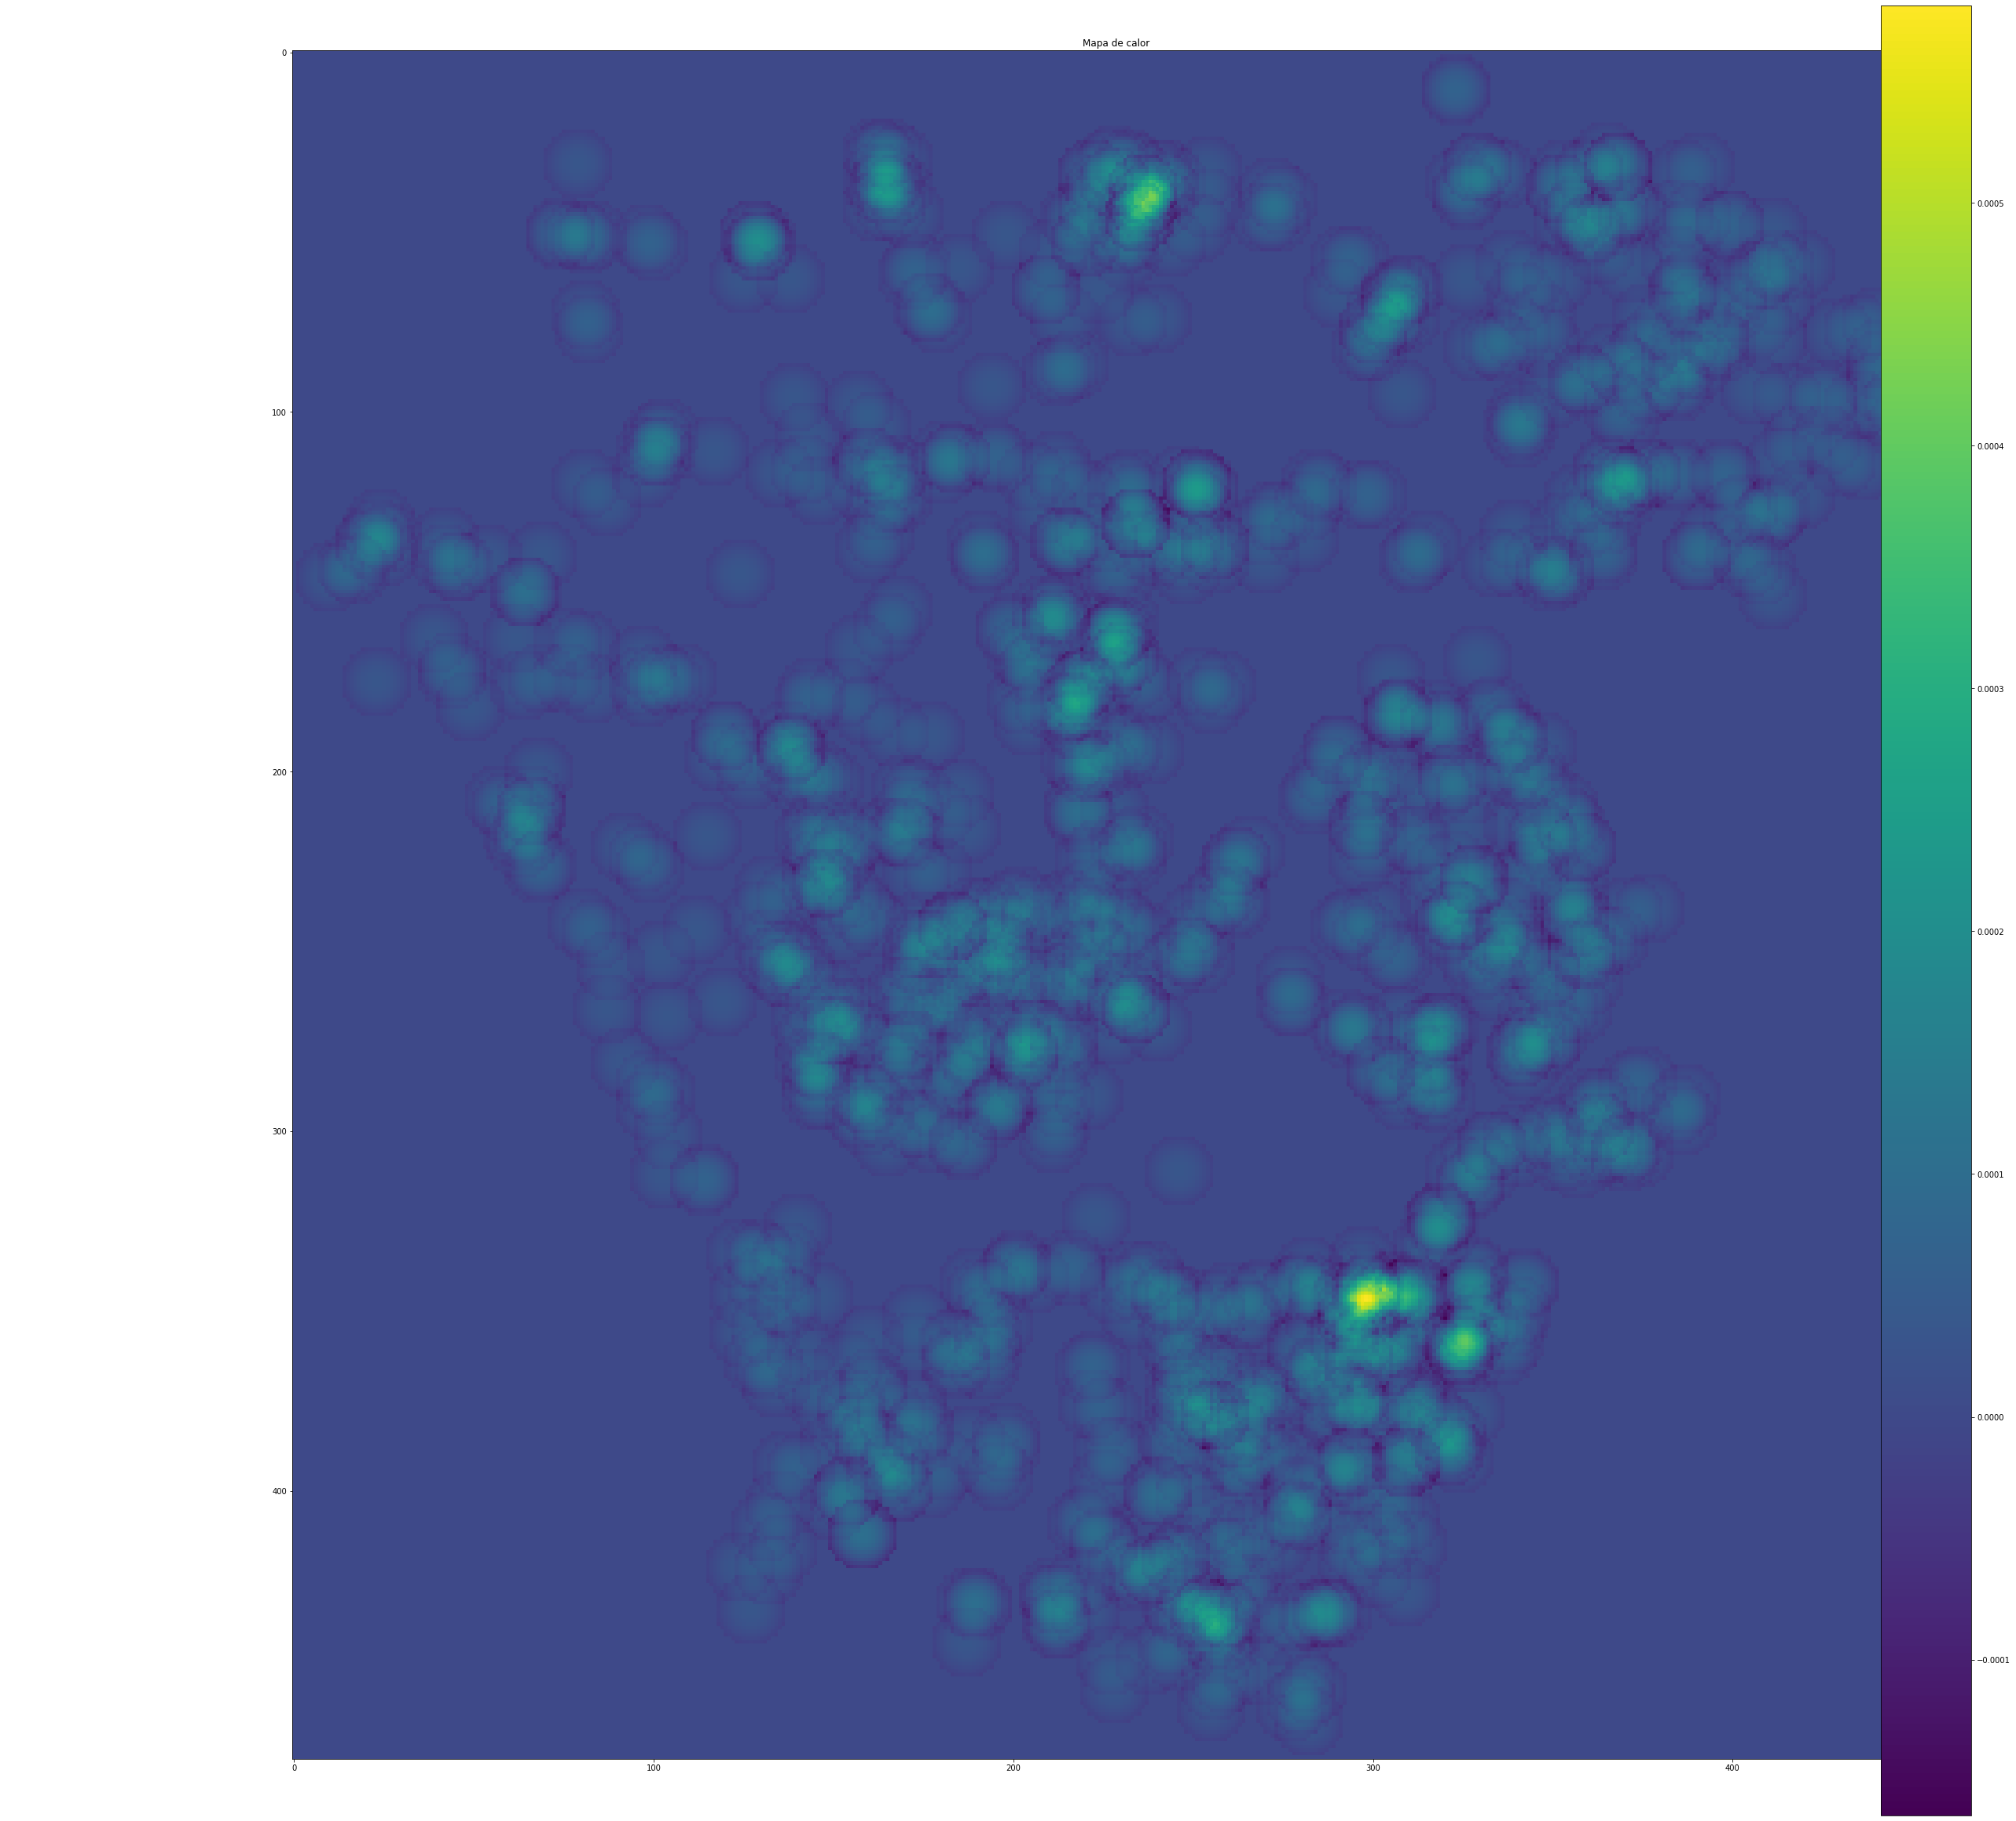

In [25]:
#res = int(input("Ingrese un valor para la resolución\n"))
#ab = int(input("Ingrese un valor para el ancho de banda\n"))
#funcion = int(input("¿Cuál función desea usar?\n1.Uniforme\n2.Triangular\n3.Gaussiana\n4.Epanechnikov\n5.Varianza Mínima\n"))

len_x, len_y, matriz = casos()
acumulado = sumatoria(len_x, len_y)
densidad = function(len_x, len_y)
paint(densidad)